<a href="https://colab.research.google.com/github/JingweiYi/MSE590-Homework/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy==1.26.4
!pip install python-ternary
!pip install scikit-learn-extra

  Using cached python_ternary-1.0.8-py3-none-any.whl.metadata (1.0 kB)
Using cached python_ternary-1.0.8-py3-none-any.whl (18 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2178147 sha256=f8af79dff0167e4bc77c183cb10398bd144baa54b79b76040452e0f23ce666b0
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold

from scipy import stats

# 1. Open the data, perform basic data preparation

In [ ]:
wip_file = Path("/content/drive/My Drive/MSE 591/Homework 3/will_it_perovskite.csv")
wip_file.exists()

True

In [ ]:
wip_data = pd.read_csv(wip_file)
col_names = {'rA (Ang)' : 'rA',
             'rB (Ang)' : 'rB',
             'rX (Ang)' : 'rX'}
wip_data = wip_data.rename(columns=col_names)
wip_data.head()

,ABX3,A,B,X,nA,nB,nX,rA,Rb,rX,t,exp_label
0,AgBrO3,Ag,Br,O,1,5,-2,1.28,0.31,1.40,1.11,-1
1,AgCdBr3,Ag,Cd,Br,1,2,-1,1.28,0.95,1.96,0.79,-1
2,PbAgBr3,Pb,Ag,Br,2,1,-1,1.49,1.15,1.96,0.78,-1
3,AgCaCl3,Ag,Ca,Cl,1,2,-1,1.28,1.00,1.81,0.78,-1
4,AgClO3,Ag,Cl,O,1,5,-2,1.28,0.12,1.40,1.25,-1


# 2. Explore the dataset using plots to understand the distribution of feature and target values

In [ ]:
wip_data.dtypes

,0
ABX3,object
A,object
B,object
X,object
nA,int64
nB,int64
nX,int64
rA,float64
Rb,float64
rX,float64


In [ ]:
wip_data.describe()

,nA,nB,nX,rA,Rb,rX,t,exp_label
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,1.930556,2.991319,-1.640625,1.357969,0.700330,1.528490,0.924792,0.086806
std,0.909106,1.078612,0.480234,0.318998,0.231042,0.259552,0.117993,0.997091
min,1.000000,1.000000,-2.000000,0.540000,0.120000,1.330000,0.710000,-1.000000
25%,1.000000,2.000000,-2.000000,1.110000,0.600000,1.400000,0.850000,-1.000000
50%,2.000000,3.000000,-2.000000,1.360000,0.690000,1.400000,0.900000,1.000000
75%,3.000000,4.000000,-1.000000,1.640000,0.800000,1.400000,0.980000,1.000000
max,5.000000,5.000000,-1.000000,1.880000,1.350000,2.200000,1.450000,1.000000


In [ ]:
for col in wip_data.columns:
  print(f"{col}:\t", wip_data[col].isnull().values.any())

ABX3:	 False
A:	 False
B:	 False
X:	 False
nA:	 False
nB:	 False
nX:	 False
rA:	 False
Rb:	 False
rX:	 False
t:	 False
exp_label:	 False


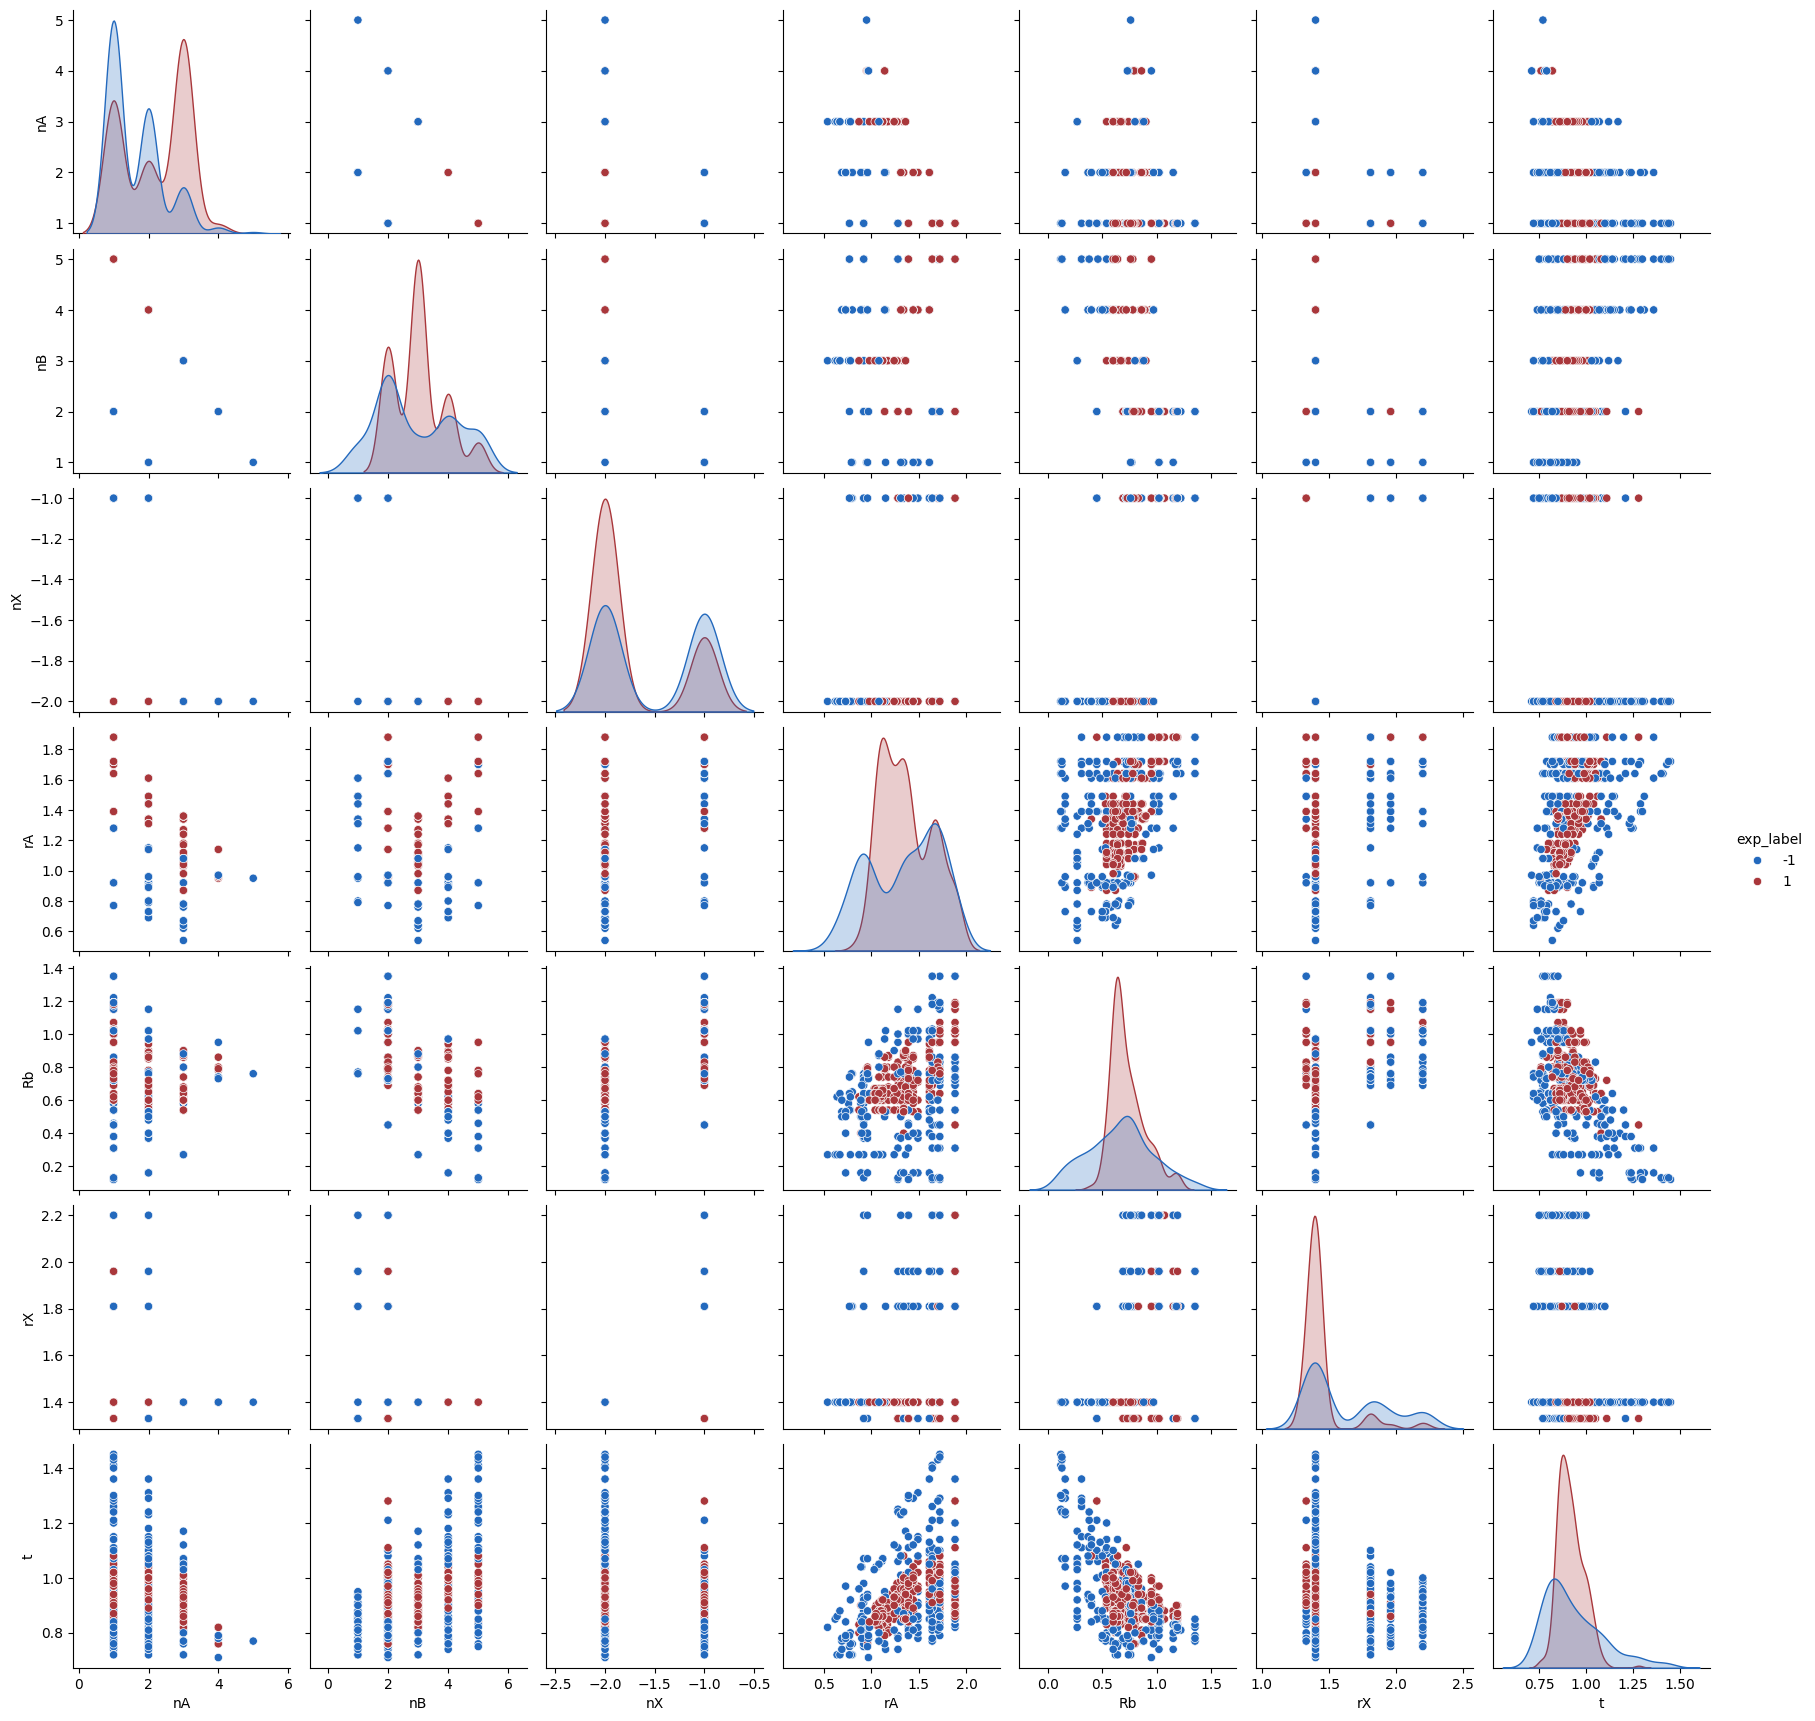

In [ ]:
sns.pairplot(data=wip_data[["nA", "nB", "nX", "rA", "Rb", "rX", "t", "exp_label"]], hue="exp_label", palette="vlag")

# -There is some imbalance in the sataset. StratifiedKFold should be preferred because it preserves the class distribution in each fold, which is important for maintaining representative samples in both training and validation sets. Also, with some class imbalance, StratifiedKFold ensures we don't get folds with skewed class distributions

# 3. Perform a 75% train, 25% test split on the dataset

In [ ]:
target = "exp_label"
features = ["nA", "nB", "nX", "t"]

X = wip_data[features]
y = wip_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=490591)

#4. Carry out cross-validation with the default DecisionTreeClassifier using 2, 5, 10, 100 and LOO CV folds

In [ ]:
model = DecisionTreeClassifier(max_depth=None)

model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Training accuracy = {round(train_acc, 3)}")
print(f"Testing accuracy = {round(test_acc, 3)}")

Training accuracy = 0.866
Testing accuracy = 0.799


* 2 folds

[0.73611111 0.75      ]
Mean validation accuracy = 0.743 ± 0.0069


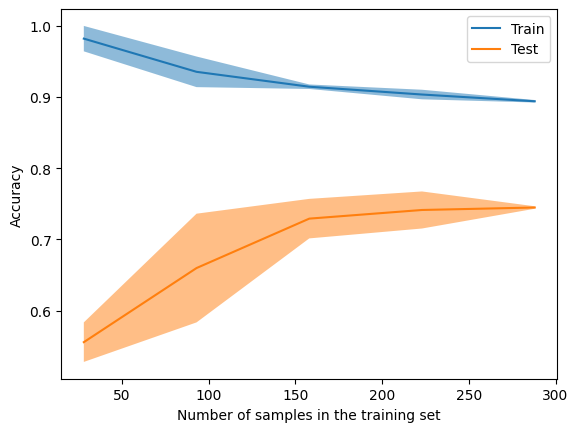

In [ ]:
k = 2
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=490591)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
print(scores)
print(f"Mean validation accuracy = {round(np.mean(scores), 3)} ± {round(np.std(scores), 4)}")

from sklearn.model_selection import LearningCurveDisplay
model = DecisionTreeClassifier()
LearningCurveDisplay.from_estimator(model, X, y, cv=kfold, scoring="accuracy", score_type="both")

* 5 folds



[0.74712644 0.79310345 0.69767442 0.84883721 0.69767442]
Mean validation accuracy = 0.757 ± 0.0581


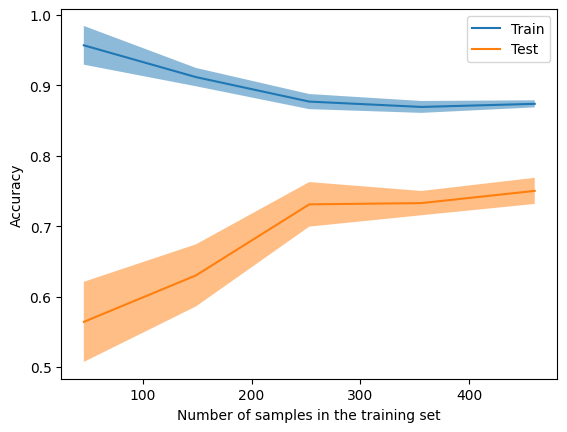

In [ ]:
k = 5
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=490591)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
print(scores)
print(f"Mean validation accuracy = {round(np.mean(scores), 3)} ± {round(np.std(scores), 4)}")

from sklearn.model_selection import LearningCurveDisplay
model = DecisionTreeClassifier()
LearningCurveDisplay.from_estimator(model, X, y, cv=kfold, scoring="accuracy", score_type="both")

* 10 folds

[0.72727273 0.77272727 0.86046512 0.76744186 0.69767442 0.74418605
 0.8372093  0.79069767 0.74418605 0.65116279]
Mean validation accuracy = 0.759 ± 0.0587


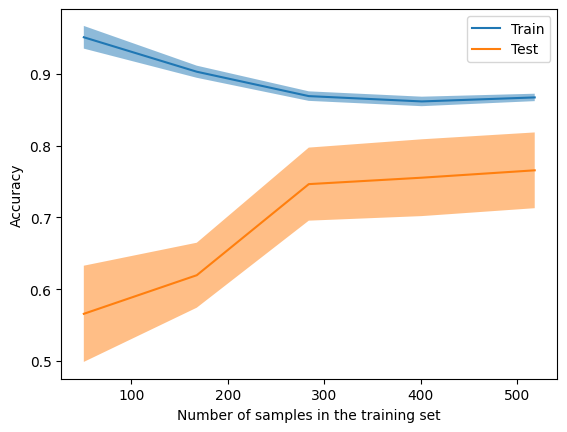

In [ ]:
k = 10
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=490591)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
print(scores)
print(f"Mean validation accuracy = {round(np.mean(scores), 3)} ± {round(np.std(scores), 4)}")

from sklearn.model_selection import LearningCurveDisplay
model = DecisionTreeClassifier()
LearningCurveDisplay.from_estimator(model, X, y, cv=kfold, scoring="accuracy", score_type="both")

* 100 folds

[1.   0.8  1.   0.8  0.8  0.6  0.6  0.8  1.   1.   0.8  0.6  1.   0.4
 0.6  1.   1.   0.8  0.6  1.   1.   0.8  1.   0.8  1.   0.6  1.   1.
 0.8  0.6  0.6  1.   0.75 0.75 0.75 1.   0.75 0.75 0.75 1.   1.   0.75
 1.   0.25 0.5  0.75 1.   1.   0.75 0.5  0.5  0.75 0.75 0.75 0.75 0.5
 0.75 0.75 1.   1.   0.5  0.75 0.5  0.75 1.   0.75 0.75 0.75 0.5  1.
 0.75 0.5  0.75 1.   0.75 0.5  1.   0.75 0.75 0.75 0.75 1.   0.75 1.
 0.75 0.75 1.   0.75 0.75 0.5  1.   0.75 0.5  0.75 0.5  1.   0.5  0.75
 0.75 0.25]
Mean validation accuracy = 0.774 ± 0.1875


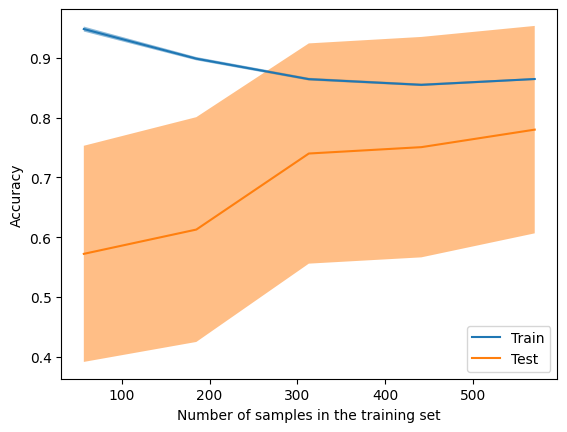

In [ ]:
k = 100
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=490591)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
print(scores)
print(f"Mean validation accuracy = {round(np.mean(scores), 3)} ± {round(np.std(scores), 4)}")

from sklearn.model_selection import LearningCurveDisplay
model = DecisionTreeClassifier()
LearningCurveDisplay.from_estimator(model, X, y, cv=kfold, scoring="accuracy", score_type="both")

* LOO fold

[1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.

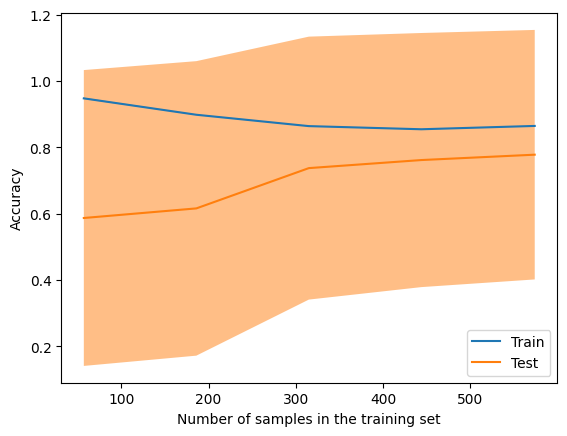

In [ ]:
k = len(X_train)
kfold = KFold(n_splits=k, shuffle=True, random_state=490591)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kfold)
print(scores)
print(f"Mean validation accuracy = {round(np.mean(scores), 3)} ± {round(np.std(scores), 4)}")

from sklearn.model_selection import LearningCurveDisplay
model = DecisionTreeClassifier()
LearningCurveDisplay.from_estimator(model, X, y, cv=kfold, scoring="accuracy", score_type="both")

/tmp/ipython-input-2409625642.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(val_data, labels=[f'k={row["k"]}' for _, row in results_df.iterrows()])


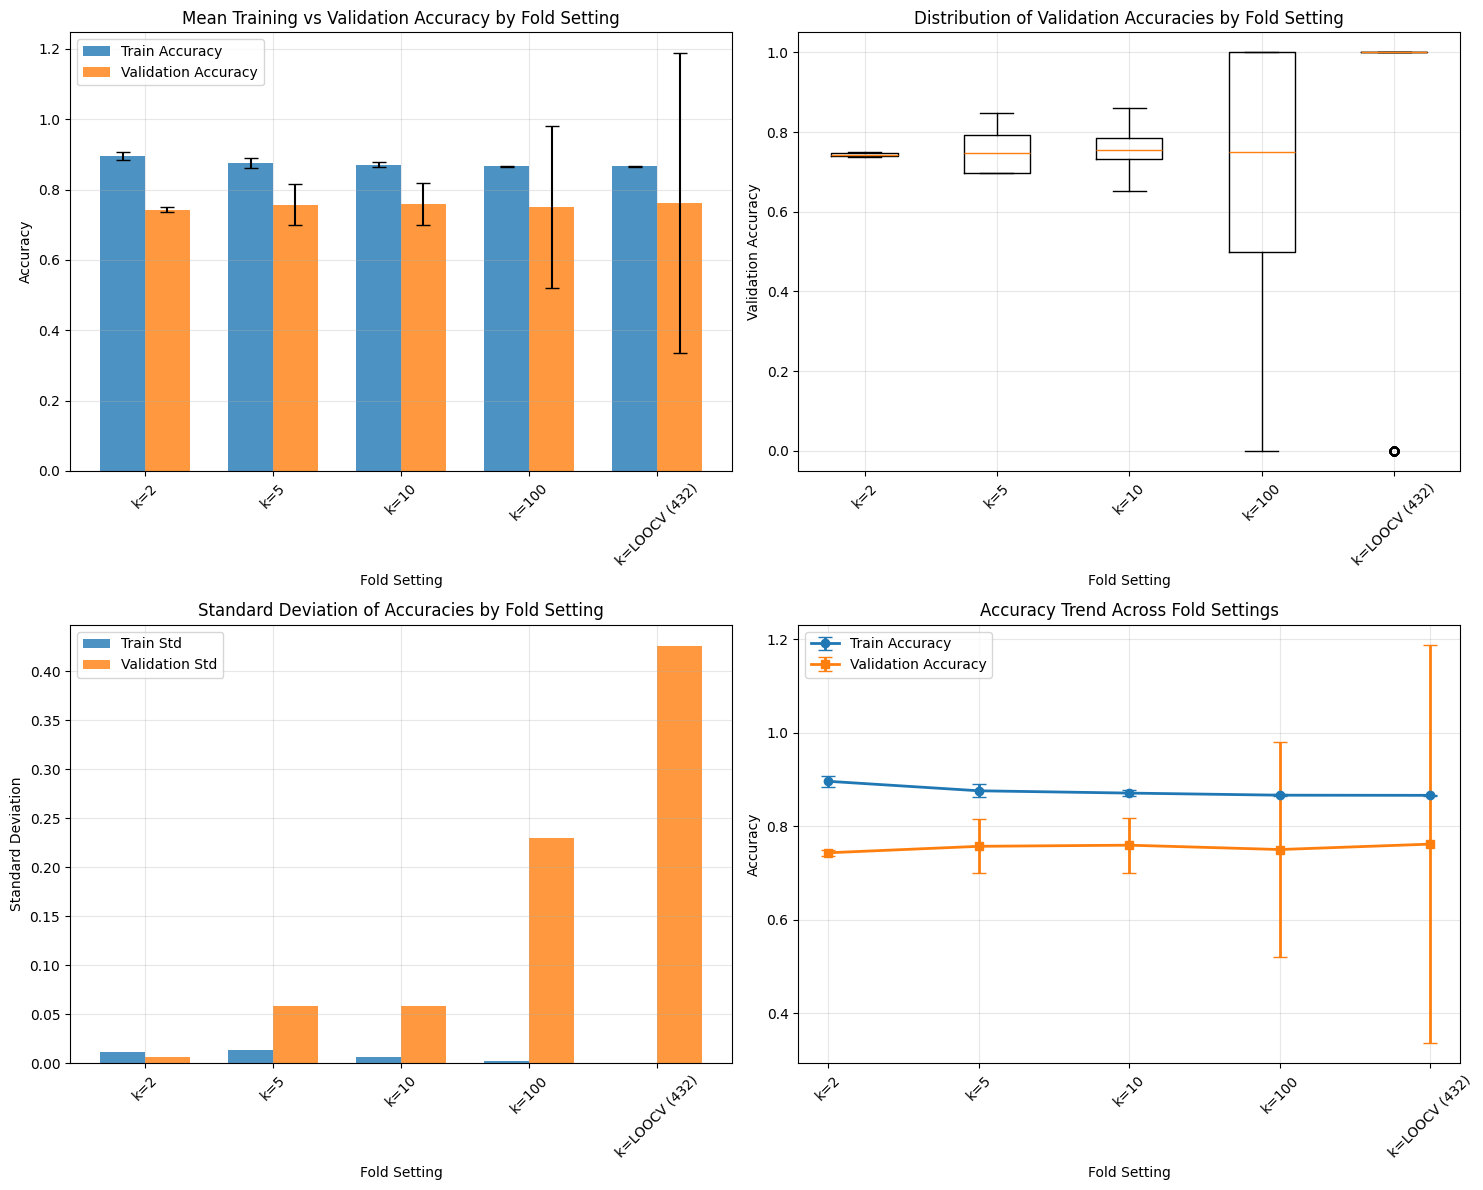


Summary Statistics:
          k       fold_type  mean_train_acc  std_train_acc  mean_val_acc  std_val_acc
          2 StratifiedKFold          0.8958         0.0116        0.7431       0.0069
          5 StratifiedKFold          0.8756         0.0139        0.7569       0.0581
         10 StratifiedKFold          0.8706         0.0066        0.7593       0.0587
        100 StratifiedKFold          0.8662         0.0020        0.7500       0.2303
LOOCV (432)           KFold          0.8658         0.0009        0.7616       0.4261

Additional Analysis:
k=2: Train-Val Gap = 0.1528, CV Error = 0.0069
k=5: Train-Val Gap = 0.1187, CV Error = 0.0581
k=10: Train-Val Gap = 0.1113, CV Error = 0.0587
k=100: Train-Val Gap = 0.1162, CV Error = 0.2303
k=LOOCV (432): Train-Val Gap = 0.1043, CV Error = 0.4261


In [ ]:
## Revised by ChatGPT

results = []

k_settings = [
    (2, 'StratifiedKFold'),
    (5, 'StratifiedKFold'),
    (10, 'StratifiedKFold'),
    (100, 'StratifiedKFold'),
    (len(X_train), 'KFold')]

for k, fold_type in k_settings:
    if fold_type == 'StratifiedKFold':
        kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=490591)
    else:
        kfold = KFold(n_splits=k, shuffle=True, random_state=490591)

    cv_results = cross_validate(model, X_train, y_train,
                               scoring='accuracy', cv=kfold,
                               return_train_score=True)

    test_scores = cv_results['test_score']
    train_scores = cv_results['train_score']

    results.append({
        'k': k if k != len(X_train) else f'LOOCV ({k})',
        'fold_type': fold_type,
        'mean_train_acc': np.mean(train_scores),
        'std_train_acc': np.std(train_scores),
        'mean_val_acc': np.mean(test_scores),
        'std_val_acc': np.std(test_scores),
        'train_scores': train_scores,
        'val_scores': test_scores})

results_df = pd.DataFrame(results)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Mean accuracy comparison
x_pos = np.arange(len(results_df))
width = 0.35

ax1.bar(x_pos - width/2, results_df['mean_train_acc'], width,
        yerr=results_df['std_train_acc'], capsize=5, label='Train Accuracy', alpha=0.8)
ax1.bar(x_pos + width/2, results_df['mean_val_acc'], width,
        yerr=results_df['std_val_acc'], capsize=5, label='Validation Accuracy', alpha=0.8)

ax1.set_xlabel('Fold Setting')
ax1.set_ylabel('Accuracy')
ax1.set_title('Mean Training vs Validation Accuracy by Fold Setting')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'k={row["k"]}' for _, row in results_df.iterrows()], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Box plot of validation accuracies
val_data = [result['val_scores'] for result in results]
ax2.boxplot(val_data, labels=[f'k={row["k"]}' for _, row in results_df.iterrows()])
ax2.set_xlabel('Fold Setting')
ax2.set_ylabel('Validation Accuracy')
ax2.set_title('Distribution of Validation Accuracies by Fold Setting')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Plot 3: Standard deviation comparison
x_pos = np.arange(len(results_df))
ax3.bar(x_pos - width/2, results_df['std_train_acc'], width, label='Train Std', alpha=0.8)
ax3.bar(x_pos + width/2, results_df['std_val_acc'], width, label='Validation Std', alpha=0.8)

ax3.set_xlabel('Fold Setting')
ax3.set_ylabel('Standard Deviation')
ax3.set_title('Standard Deviation of Accuracies by Fold Setting')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f'k={row["k"]}' for _, row in results_df.iterrows()], rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Line plot showing trend
ax4.errorbar(x_pos, results_df['mean_train_acc'], yerr=results_df['std_train_acc'],
            marker='o', label='Train Accuracy', capsize=5, linewidth=2)
ax4.errorbar(x_pos, results_df['mean_val_acc'], yerr=results_df['std_val_acc'],
            marker='s', label='Validation Accuracy', capsize=5, linewidth=2)

ax4.set_xlabel('Fold Setting')
ax4.set_ylabel('Accuracy')
ax4.set_title('Accuracy Trend Across Fold Settings')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'k={row["k"]}' for _, row in results_df.iterrows()], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary Statistics:")
print("=" * 80)
summary_table = results_df[['k', 'fold_type', 'mean_train_acc', 'std_train_acc',
                           'mean_val_acc', 'std_val_acc']].copy()
summary_table['mean_train_acc'] = summary_table['mean_train_acc'].round(4)
summary_table['std_train_acc'] = summary_table['std_train_acc'].round(4)
summary_table['mean_val_acc'] = summary_table['mean_val_acc'].round(4)
summary_table['std_val_acc'] = summary_table['std_val_acc'].round(4)
print(summary_table.to_string(index=False))

# Additional analysis
print("\nAdditional Analysis:")
print("=" * 50)
for _, row in results_df.iterrows():
    k_val = row['k']
    gap = row['mean_train_acc'] - row['mean_val_acc']
    cv_error = row['std_val_acc']
    print(f"k={k_val}: Train-Val Gap = {gap:.4f}, CV Error = {cv_error:.4f}")

# -I select 5-fold CV because it provides a good trade-off between bias and variance, and he performance is stable and reliable

#5. Find the optimal value of the classifier’s hyperparameter (max_depth). Plot training and validation accuracies.

In [34]:
max_depth_range = range(1, 21)

train_scores_mean = []
train_scores_std = []
val_scores_mean = []
val_scores_std = []

# 5-fold CV
for max_depth in max_depth_range:
    print(f"Testing max_depth = {max_depth}")

    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=490591)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=490591)
    train_fold_scores = []
    val_fold_scores = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        dt.fit(X_fold_train, y_fold_train)

        train_pred = dt.predict(X_fold_train)
        train_fold_scores.append(accuracy_score(y_fold_train, train_pred))

        val_pred = dt.predict(X_fold_val)
        val_fold_scores.append(accuracy_score(y_fold_val, val_pred))

    train_scores_mean.append(np.mean(train_fold_scores))
    train_scores_std.append(np.std(train_fold_scores))
    val_scores_mean.append(np.mean(val_fold_scores))
    val_scores_std.append(np.std(val_fold_scores))

tuning_results = pd.DataFrame({
    'max_depth': max_depth_range,
    'train_mean': train_scores_mean,
    'train_std': train_scores_std,
    'val_mean': val_scores_mean,
    'val_std': val_scores_std})

print("Hyperparameter Tuning Results:")
tuning_results

Testing max_depth = 1
Testing max_depth = 2
Testing max_depth = 3
Testing max_depth = 4
Testing max_depth = 5
Testing max_depth = 6
Testing max_depth = 7
Testing max_depth = 8
Testing max_depth = 9
Testing max_depth = 10
Testing max_depth = 11
Testing max_depth = 12
Testing max_depth = 13
Testing max_depth = 14
Testing max_depth = 15
Testing max_depth = 16
Testing max_depth = 17
Testing max_depth = 18
Testing max_depth = 19
Testing max_depth = 20
Hyperparameter Tuning Results:


,max_depth,train_mean,train_std,val_mean,val_std
0,1,0.666655,0.012770,0.627052,0.057509
1,2,0.744195,0.018423,0.708260,0.034291
2,3,0.779467,0.036590,0.717696,0.032252
3,4,0.804959,0.027558,0.759048,0.044664
4,5,0.829265,0.018018,0.770596,0.053511
5,6,0.836218,0.008669,0.779845,0.057142
6,7,0.847793,0.008839,0.761401,0.053837
7,8,0.853000,0.010700,0.773002,0.048933
8,9,0.860528,0.012913,0.759022,0.083173
9,10,0.867473,0.012102,0.756910,0.043643


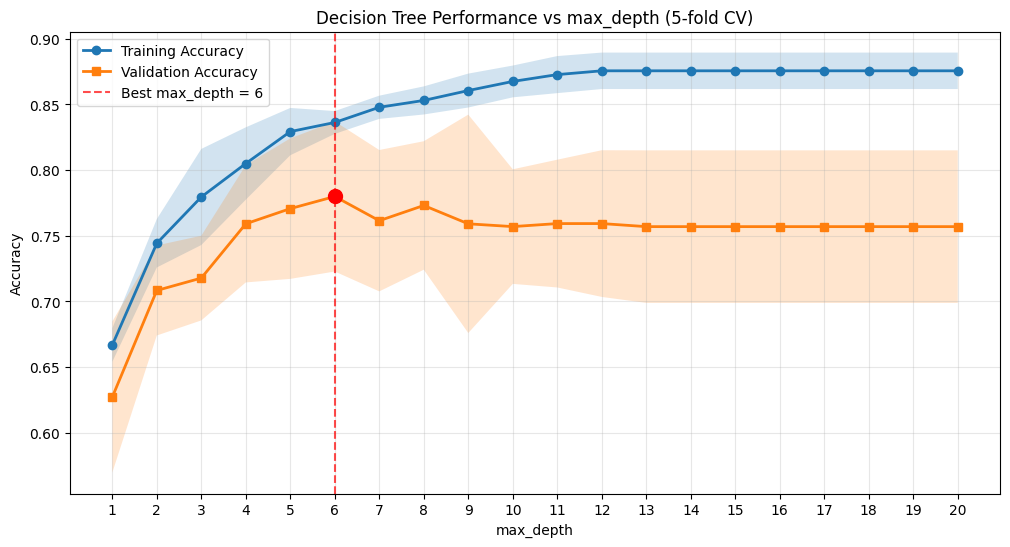

Best max_depth: 6
Best validation accuracy: 0.7798


In [35]:
# Revised by ChatGPT

plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, train_scores_mean, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(max_depth_range, val_scores_mean, 's-', label='Validation Accuracy', linewidth=2)

# Add error bars (standard deviation)
plt.fill_between(max_depth_range,
                 np.array(train_scores_mean) - np.array(train_scores_std),
                 np.array(train_scores_mean) + np.array(train_scores_std),
                 alpha=0.2)
plt.fill_between(max_depth_range,
                 np.array(val_scores_mean) - np.array(val_scores_std),
                 np.array(val_scores_mean) + np.array(val_scores_std),
                 alpha=0.2)

# Highlight the best validation accuracy
best_val_idx = np.argmax(val_scores_mean)
best_max_depth = max_depth_range[best_val_idx]
best_val_accuracy = val_scores_mean[best_val_idx]

plt.axvline(x=best_max_depth, color='red', linestyle='--', alpha=0.7,
            label=f'Best max_depth = {best_max_depth}')
plt.plot(best_max_depth, best_val_accuracy, 'ro', markersize=10)

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs max_depth (5-fold CV)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(max_depth_range)
plt.show()

print(f"Best max_depth: {best_max_depth}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

# -Based on the hyperparameter tuning results, max depth = 6 provides the best validation accuracy

# 6. Using the decisions you’ve made in the previous questions, train the classifier and test its performance on the held-out test set

Final Model Performance:
Training Accuracy: 0.8333
Test Accuracy: 0.7986
Cross-validation scores: [0.8045977  0.86206897 0.70930233 0.80232558 0.72093023]
Mean CV accuracy: 0.7798 ± 0.0571
Feature Importance:
  feature  importance
3       t    0.726219
0      nA    0.207286
1      nB    0.066495
2      nX    0.000000


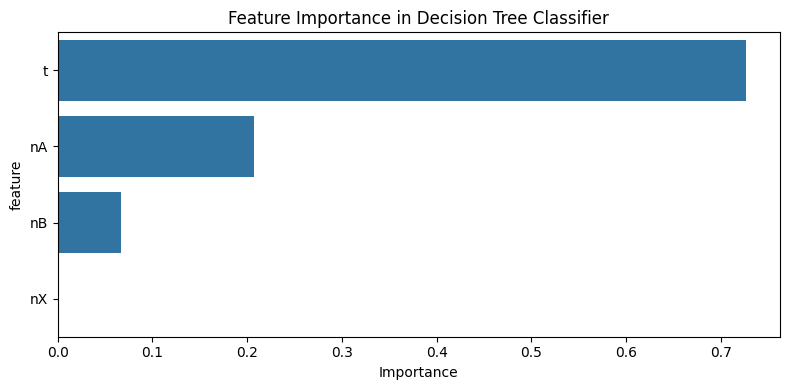

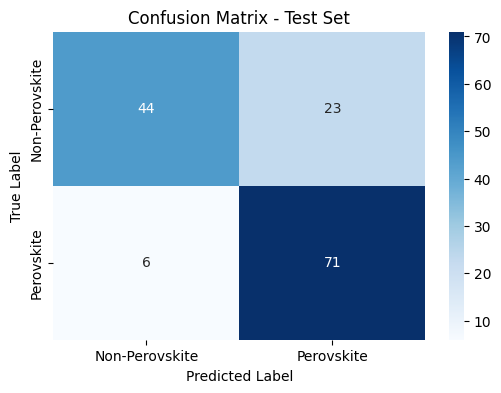

Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.66      0.75        67
           1       0.76      0.92      0.83        77

    accuracy                           0.80       144
   macro avg       0.82      0.79      0.79       144
weighted avg       0.81      0.80      0.79       144



In [40]:
final_dt = DecisionTreeClassifier(max_depth=6, random_state=490591)
final_dt.fit(X_train, y_train)

y_train_pred = final_dt.predict(X_train)
y_test_pred = final_dt.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Final Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

cv_scores = cross_val_score(final_dt, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=490591))
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': final_dt.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 4))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Decision Tree Classifier')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


# Revised by ChatGPT
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Perovskite', 'Perovskite'],
            yticklabels=['Non-Perovskite', 'Perovskite'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Summary

1.   When dealing with imbalanced datasets, StratifiedKFold ensures that each fold maintains the same class distribution as the overall dataset. This prevents biased performance estimates that could occur if some folds happened to have skewed class distributions.
2.   Through comparing different numbers of folds, I learned that extremely high numbers of folds (LOO) can lead to high variance in performance estimates, while too few folds (2-fold) can give biased estimates.